In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !cd /content/drive/'path'

In [5]:
!pip install lxml
!pip install wordcloud
!pip install imblearn
!pip install scikit-learn

In [4]:
# !pip install faster-whisper
# !pip install gradio
# !pip install googletrans==4.0.0-rc1
# !pip install --upgrade tensorflow

In [5]:
# from faster_whisper import WhisperModel

# stt_model = WhisperModel("large-v3")

In [6]:
# # stt를 실행하는 함수
# def stt_func(filepath):

#   transcripts = []

#   segments, info = stt_model.transcribe(filepath, language="ko")
#   tmp = ""
#   for segment in segments:
#     tmp = tmp + segment.text
#     transcripts.append(tmp)

#   return transcripts

In [7]:
# record = []
# def trans_audio(filepath):
#     segments, info = stt_model.transcribe(filepath, language="en", task = "transcribe")
#     tmp = ""
#     for segment in segments:
#         tmp = tmp + segment.text
#         record.append(tmp)
#     return tmp

# import gradio as gr
# import time

# def recording():
#   output_1 = gr.Textbox(label="Speech to Text")

#   gr.Interface(
#     title = 'OpenAI Whisper ASR Gradio Web UI',
#     fn = trans_audio,
#     inputs=[gr.Audio(type="filepath")],
#     outputs = [output_1],
#     live=True).launch()

In [8]:
# from googletrans import Translator
# def translate_file(input_file_path, output_file_path, src_lang='ko', dest_lang='en'):
#     # 번역기 초기화
#     translator = Translator()

#     # 입력 파일 읽기
#     with open(input_file_path, 'r', encoding='utf-8') as file:
#         korean_text = file.read()

#     # 한국어 텍스트를 영어로 번역
#     translation = translator.translate(korean_text, src=src_lang, dest=dest_lang)
#     english_text = translation.text

#     # 번역된 텍스트를 출력 파일로 저장
#     with open(output_file_path, 'w', encoding='utf-8') as file:
#         file.write(english_text)

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# CSV 파일 불러오기
data1 = pd.read_csv('/content/drive/MyDrive/MBTI 500.csv')
data2 = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')

# MBTI_500과 mbti 데이터 합치기
data = pd.concat([data1, data2], ignore_index=True)

# 기존에 T 또는 F를 포함하는 성격 유형에 대해 해당 문자로 대체
data['type'] = data['type'].replace({
    'INTJ': 'T', 'INTP': 'T', 'ENTJ': 'T', 'ENTP': 'T',
    'ISTJ': 'T', 'ISTP': 'T', 'ESTJ': 'T', 'ESTP': 'T',
    'INFJ': 'F', 'INFP': 'F', 'ENFJ': 'F', 'ENFP': 'F',
    'ISFJ': 'F', 'ISFP': 'F', 'ESFJ': 'F', 'ESFP': 'F'
})

# 데이터 프레임 확인
data

,posts,type
0,know intj tool use interaction people excuse a...,T
1,rap music ehh opp yeah know valid well know fa...,T
2,preferably p hd low except wew lad video p min...,T
3,drink like wish could drink red wine give head...,T
4,space program ah bad deal meing freelance max ...,T
...,...,...
114737,'https://www.youtube.com/watch?v=t8edHB_h908||...,F
114738,'So...if this thread already exists someplace ...,F
114739,'So many questions when i do these things. I ...,T
114740,'I am very conflicted right now when it comes ...,F


In [7]:
# 전처리 함수에서 사용할 contractions
contractions = {
    "'cause": 'because', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have',
    "I'm": 'I am', "I've": 'I have', "ain't": 'is not', "aren't": 'are not', "can't": 'cannot', "could've": 'could have',
    "couldn't": 'could not', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not',
    "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'll": 'he will', "he's": 'he is', "here's": 'here is',
    "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "i'd": 'i would', "i'd've": 'i would have',
    "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would',
    "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam',
    "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have',
    "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock',
    "oughtn't": 'ought not', "oughtn't've": 'ought not have', "sha'n't": 'shall not', "shan't": 'shall not', "shan't've": 'shall not have',
    "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is',
    "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so's": 'so as', "so've": 'so have',
    "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there would', "there'd've": 'there would have',
    "there's": 'there is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have',
    "they're": 'they are', "they've": 'they have', "this's": 'this is', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would',
    "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not',
    "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have',
    "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will',
    "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have',
    "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have',
    "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have',
    "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have'
}

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import re
from bs4 import BeautifulSoup
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence)   # Links 제거
    sentence = sentence.lower()                               # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text           # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence)             # 괄호로 닫힌 문자열  제거 ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence)                       # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence)                    # 소유격 제거. ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence)             # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence)               # m이 3개 이상이면 2개로 변경. ex) ummmmmmm  -> umm

    pers_types = ['infp' ,'infj', 'intp', 'intj', 'istp', 'isfp', 'isfj','istp',
                  'entp', 'enfp', 'entj', 'enfj', 'estp', 'esfp' ,'esfj' ,'estj']
    for types in pers_types:
      sentence = sentence.replace(types, '')

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

# 데이터 프레임의 'posts' 컬럼에 전처리 적용
clean_posts = []
for s in data['posts']:
    clean_posts.append(preprocess_sentence(s))

# 전처리된 결과 확인
print(clean_posts[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat really go

In [6]:
data['posts'] = clean_posts
data

,posts,type
0,know tool use interaction people excuse antiso...,T
1,rap music ehh opp yeah know valid well know fa...,T
2,preferably hd low except wew lad video mind go...,T
3,drink like wish could drink red wine give head...,T
4,space program ah bad deal meing freelance max ...,T
...,...,...
114737,always think cats fi doms reason websites beco...,F
114738,thread already exists someplace else list film...,F
114739,many questions things would take purple pill p...,T
114740,conflicted right comes wanting children honest...,F


In [7]:
type_counts = data['type'].value_counts()
type_counts

type
T    73184
F    41558
Name: count, dtype: int64

In [8]:
data.isnull().sum()

posts    0
type     0
dtype: int64

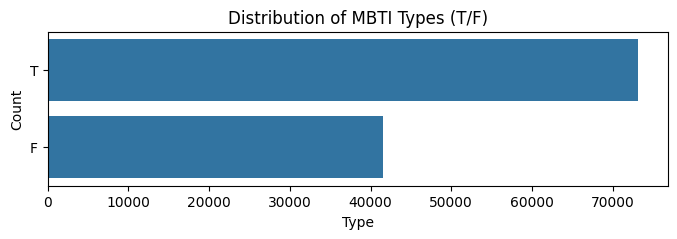

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 타입 분포 히스토그램
plt.figure(figsize=(8, 2))
sns.countplot(data['type'])
plt.title('Distribution of MBTI Types (T/F)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

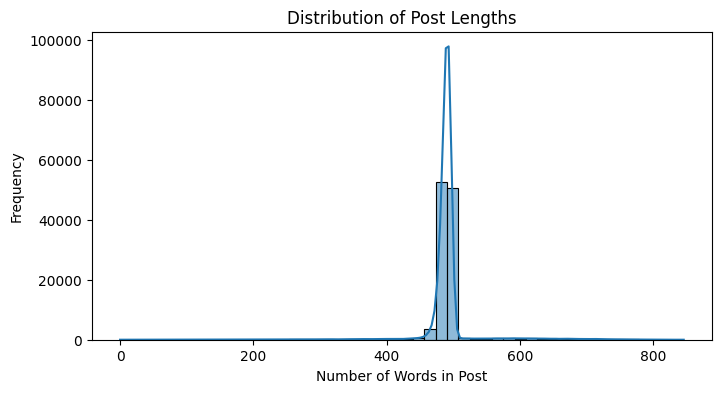

In [23]:
# 포스트 길이 분포 히스토그램
post_lengths = data['posts'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(post_lengths, bins=50, kde=True)
plt.title('Distribution of Post Lengths')
plt.xlabel('Number of Words in Post')
plt.ylabel('Frequency')
plt.show()

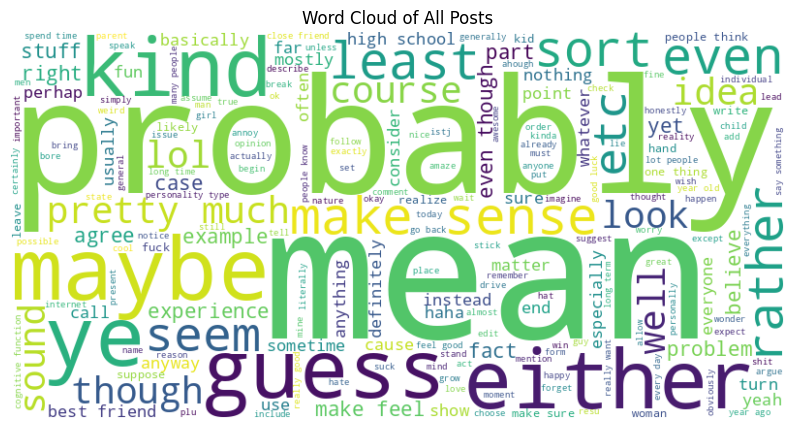

In [19]:
# 워드 클라우드
all_posts = ' '.join(data['posts'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_posts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Posts')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분할
X = data['posts']
y = data['type']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF 벡터화 및 모델 학습 파이프라인
tfidf = TfidfVectorizer(lowercase=False)
X_train_str = [str(x) for x in X_train]
X_train_tfidf = tfidf.fit_transform(X_train_str)

clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)
cv = GridSearchCV(clf, {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}, scoring = "accuracy")

train_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', cv)
])
train_clf.fit(X_train_str, y_train)

# 최적 파라미터로 재학습
best_C = cv.best_estimator_.C
print(f'best C: {best_C}')

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', LinearSVC(C=best_C))
])
text_clf.fit(X_train_str, y_train)

# 검증 데이터로 성능 확인
X_val_str = [str(x) for x in X_val]
pred = text_clf.predict(X_val_str)
print(f'Validation Accuracy: {accuracy_score(y_val, pred):.4f}')

# 테스트 데이터로 성능 확인
X_test_str = [str(x) for x in X_test]
pred_svc = text_clf.predict(X_test_str)
print(f'Test Accuracy: {accuracy_score(y_test, pred_svc):.4f}')

# 전체 데이터로 모델 재학습
X_str = [str(x) for x in X]
svc_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', LinearSVC(C=best_C))
])
svc_clf.fit(X_str, y)
pred_total_svc = svc_clf.predict(X_str)
print(f'Total Model Accuracy: {accuracy_score(y, pred_total_svc):.4f}')

best C: 0.5
Validation Accuracy: 0.8935
Test Accuracy: 0.8978
The predicted MBTI type for the new sentence is: T


In [63]:
# 새로운 문장에 대한 예측 함수
def predict_mbti_type(new_sentence):
    new_sentence = str(new_sentence)
    prediction = svc_clf.predict([new_sentence])
    return prediction[0]

# 새로운 문장 예측 예시
new_sentence = "I love programming and solving complex problems."
predicted_type = predict_mbti_type(new_sentence)
print(f'The predicted MBTI type for the new sentence is: {predicted_type}')

The predicted MBTI type for the new sentence is: T


In [7]:
#SMOTE 사용 후 training
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# SMOTE를 사용하기 위해서 예측 변수, 설명 변수 모두 인코딩
encoder_X = OneHotEncoder()
encoded_X = encoder_X.fit_transform(data['posts'].to_numpy().reshape(-1, 1))
encoder_y = LabelEncoder()
encoded_y = encoder_y.fit_transform(data['type'].to_numpy().reshape(-1, 1))

In [8]:
import sklearn
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(encoded_X, encoded_y)

In [9]:
# 인코딩한 변수들을 다시 문자열로 디코딩하는 함수 정의
def text_inverse_transform_X(encoded_data, encoder):
    decoded_data = encoder.inverse_transform(encoded_data)
    return decoded_data

def text_inverse_transform_y(encoded_data, encoder):
    decoded_data = encoder.inverse_transform(encoded_data)
    return decoded_data

# 예측 변수, 설명 변수 디코딩
X_data = text_inverse_transform_X(X_resampled, encoder_X)
y_data = text_inverse_transform_y(y_resampled, encoder_y)
y_data

array(['T', 'T', 'T', ..., 'F', 'F', 'F'], dtype=object)

In [10]:
X_data

array([['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat re

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_decoded = [x.decode('utf-8') if isinstance(x, bytes) else x for x in X_data]
y_decoded = [y.decode('utf-8') if isinstance(y, bytes) else y for y in y_data]

X, X_test, y, y_test = train_test_split(X_decoded, y_decoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# TF-IDF 벡터화 및 모델 학습 파이프라인
tfidf = TfidfVectorizer(lowercase=False)
X_train_str = [str(x) for x in X_train]
X_train_tfidf = tfidf.fit_transform(X_train_str)

clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)
cv = GridSearchCV(clf, {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]}, scoring = "accuracy")

train_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', cv)
])
train_clf.fit(X_train_str, y_train)

# 최적 파라미터로 재학습
best_C = cv.best_estimator_.C
print(f'best C: {best_C}')

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', LinearSVC(C=best_C))
])
text_clf.fit(X_train_str, y_train)

# 검증 데이터로 성능 확인
X_val_str = [str(x) for x in X_val]
pred = text_clf.predict(X_val_str)
print(f'Validation Accuracy: {accuracy_score(y_val, pred):.4f}')

# 테스트 데이터로 성능 확인
X_test_str = [str(x) for x in X_test]
pred_svc = text_clf.predict(X_test_str)
print(f'Test Accuracy: {accuracy_score(y_test, pred_svc):.4f}')

# 전체 데이터로 모델 재학습
X_str = [str(x) for x in X]
svc_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('clf', LinearSVC(C=best_C))
])
svc_clf.fit(X_str, y)

best C: 1.0
Validation Accuracy: 0.9155
Test Accuracy: 0.9149


Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LinearSVC())])